<a href="https://colab.research.google.com/github/om7503/Multiple-diseases-prediction-System/blob/main/ParkinsonFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
w# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import joblib  # For saving and loading models

# Loading the Parkinson's dataset
parkinsons_data = pd.read_csv('/content/parkinsons.csv')

# Drop the 'name' column as it is not useful for model training
parkinsons_data = parkinsons_data.drop(columns='name', axis=1)

# Splitting the features and target
X = parkinsons_data.drop(columns='status', axis=1)  # Features
Y = parkinsons_data['status']  # Target

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, stratify=Y, random_state=2)

# --- Random Forest Model with Reduced Parameters ---
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=2)
rf_model.fit(X_train, Y_train)

# Save the trained Random Forest model
joblib.dump(rf_model, 'parkinsons_rf_model.sav')

# Evaluate Random Forest model
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(Y_test, rf_predictions)
print('Random Forest Accuracy: ', rf_accuracy)

# --- Gradient Boosting Model with Reduced Parameters ---
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=2)
gb_model.fit(X_train, Y_train)

# Save the trained Gradient Boosting model
joblib.dump(gb_model, 'parkinsons_gb_model.sav')

# Evaluate Gradient Boosting model
gb_predictions = gb_model.predict(X_test)
gb_accuracy = accuracy_score(Y_test, gb_predictions)
print('Gradient Boosting Accuracy: ', gb_accuracy)

# Comparing Results
if rf_accuracy > gb_accuracy:
    print(f'Best Model: Random Forest with accuracy of {rf_accuracy}')
else:
    print(f'Best Model: Gradient Boosting with accuracy of {gb_accuracy}')


Random Forest Accuracy:  0.9743589743589743
Gradient Boosting Accuracy:  0.9487179487179487
Best Model: Random Forest with accuracy of 0.9743589743589743


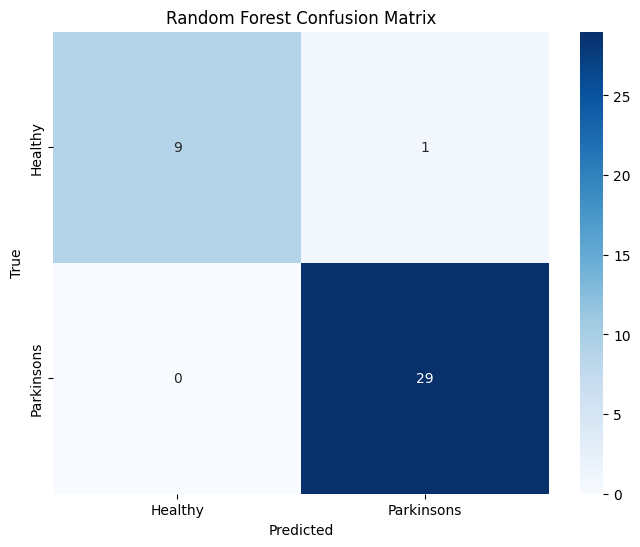

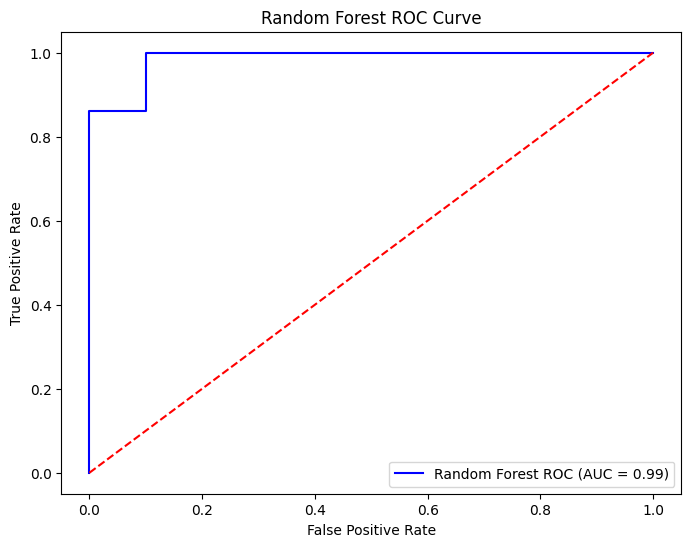

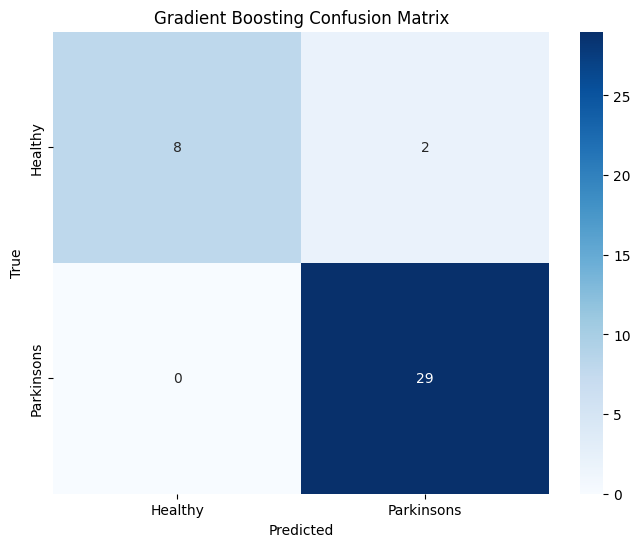

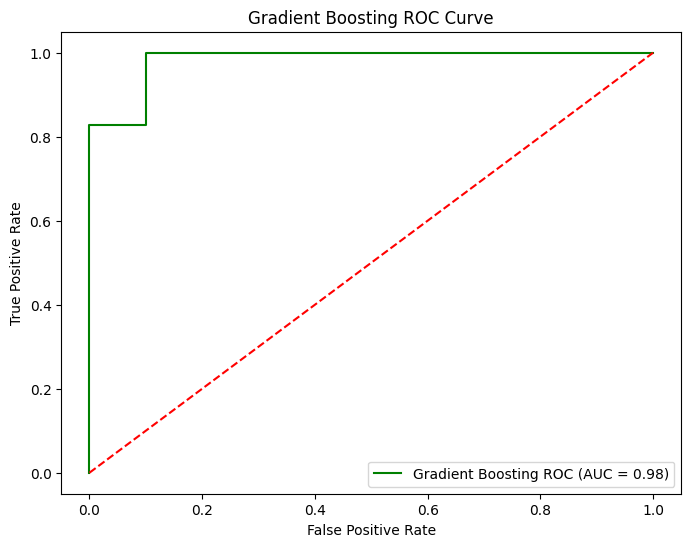

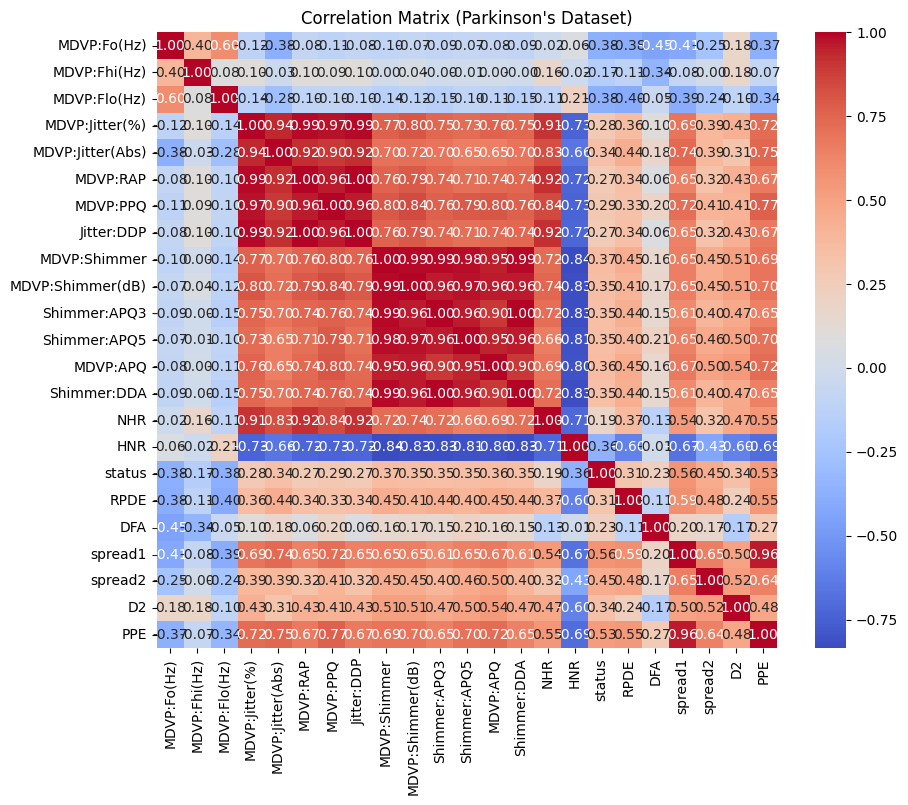

In [ ]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# --- Random Forest Model Evaluation ---

# Confusion Matrix
rf_conf_matrix = confusion_matrix(Y_test, rf_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy', 'Parkinsons'], yticklabels=['Healthy', 'Parkinsons'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC Curve for Random Forest
rf_prob = rf_model.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, rf_thresholds = roc_curve(Y_test, rf_prob)
rf_roc_auc = roc_auc_score(Y_test, rf_prob)

plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, color='blue', label='Random Forest ROC (AUC = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Random Forest ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# --- Gradient Boosting Model Evaluation ---

# Confusion Matrix
gb_conf_matrix = confusion_matrix(Y_test, gb_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(gb_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy', 'Parkinsons'], yticklabels=['Healthy', 'Parkinsons'])
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC Curve for Gradient Boosting
gb_prob = gb_model.predict_proba(X_test)[:, 1]
gb_fpr, gb_tpr, gb_thresholds = roc_curve(Y_test, gb_prob)
gb_roc_auc = roc_auc_score(Y_test, gb_prob)

plt.figure(figsize=(8, 6))
plt.plot(gb_fpr, gb_tpr, color='green', label='Gradient Boosting ROC (AUC = %0.2f)' % gb_roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Gradient Boosting ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# --- Correlation Matrix ---
plt.figure(figsize=(10, 8))
correlation = parkinsons_data.corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix (Parkinson\'s Dataset)')
plt.show()
